In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [38]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
print(df.duplicated().sum())

0


In [47]:
df.drop_duplicates(inplace=True)

In [48]:
print(df.drop_duplicates)

<bound method DataFrame.drop_duplicates of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                        

In [49]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [50]:
df['Sex'] = titanic_df['Sex'].map({'male' : 0, 'female': 1})

In [55]:
print(df.head)

<bound method NDFrame.head of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name  Sex        Age  SibSp  \
0                              Braund, Mr. Owen Harris  NaN  22.000000      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.000000      1   
2                               Heikkinen, Miss. Laina  NaN  26.000000      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.000000      1   
4                             Allen, Mr. William Henry  NaN  35.000000      0   
..                         

In [56]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [59]:
df['Age'] = pd.to_numeric(df['Age'])

In [60]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
891 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [64]:
df['Age'].fillna(df['Age'].median(),inplace=True)

In [66]:
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex            891
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [68]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['FamilySize'].head()

,FamilySize
0,2
1,2
2,1
3,2
4,1


In [69]:
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  NaN  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  NaN  38.0      1      0   
2                             Heikkinen, Miss. Laina  NaN  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  NaN  35.0      1      0   
4                           Allen, Mr. William Henry  NaN  35.0      0      0   

             Ticket     Fare Cabin  FamilySize  Embarked_C  Embarked_Q  \
0         A/5 21171   7.2500   NaN           2       False       False   
1          PC 17599  71.2833   C85           2        True       False   
2  STON/O2. 3101282   7.9250   NaN           1       False       False   


In [70]:
print(df[['Age', 'Fare']].describe())

              Age        Fare
count  891.000000  891.000000
mean    29.699118   32.204208
std     13.002015   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     29.699118   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200


Text(0.5, 1.0, 'Fare Distribution')

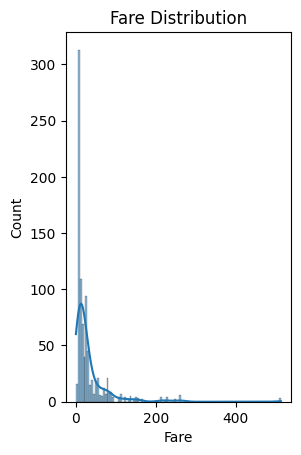

In [67]:
plt.subplot(1, 2, 2)
sns.histplot(titanic_df['Fare'], kde=True)
plt.title('Fare Distribution')

In [71]:
plt.show()

Text(0.5, 1.0, 'Survival Rate by Pclass')

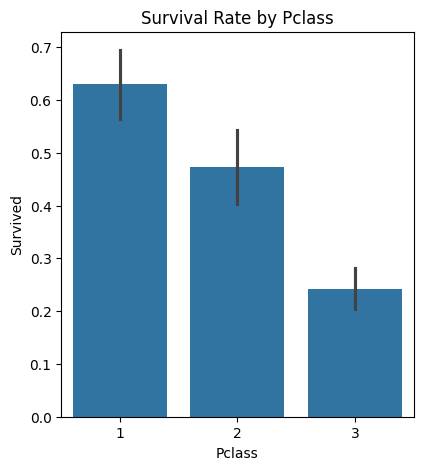

In [72]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Pclass')

Text(0.5, 1.0, 'Survival Rate by Sex')

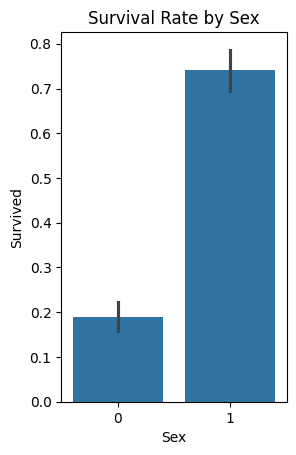

In [27]:
plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')